# Data Science Challenge: Card Transactions

### PROBLEM STATEMENT: To build a predictive model to determine whether a given transaction will be fraudulent or not.

## INSTRUCTIONS TO RUN:

#### 1) Import the follwoing libraries<br>2) Data file and the ipynb file should be at same location

# Importing Libraries

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Q1: Load 

In [2]:
#Importing the dataset
file = open('transactions.txt', 'r')

In [3]:
#Reading the data
lis1 = file.readlines()

In [4]:
#Creating empty dictionary to load the data into required format
dic = {}
for i in range(len(lis1)):
    dic[i] = json.loads(lis1[i][:-1])

In [5]:
#Converted to dataframe and replaced space with nan
data_final = pd.DataFrame.from_dict(dic).T
data_final.replace('', np.nan, inplace=True)

In [6]:
data_final

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [7]:
#List of columns
data_final.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

#### The dataset comprises of 786363 records with 29 fields .

In [8]:
#Structure of the data
data_final.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                  float64
currentBalance              float64
merchantCity                float64
merchantState               float64
merchantZip                 float64
cardPresent                    bool
posOnPremises               float64
recurringAuthInd            float64
expirationDateKeyInMatch    

#### The dataset comprises of 3 types of data , float (10 attributes), object(16 attributes), bool(3 attributes)

In [9]:
#Display null values with respective fields
data_final.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

#### Since echo buffer, merchantcity, merchantstate, merchantzip, posOnPremises, recurringAuthInd have no values present for all the records. They can be dropped from the data.

In [10]:
#Dropping the columns with no values
data_final.drop(["echoBuffer", "merchantCity", "merchantState", "merchantZip", "posOnPremises", "recurringAuthInd"], axis=1,
          inplace=True)

In [11]:
#Copied the data_final to data
data = data_final.copy()

In [12]:
#Validating columns
data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

# EDA and Data Preprocessing

In [13]:
#Unique values of accountNumber
data["accountNumber"].nunique()

5000

In [14]:
#Unique values of customerId
data["customerId"].nunique()

5000

#### Out of all the records present there are 5000 unique "customerId" and "accountNumber".

In [15]:
#Properties of creditLimit
data["creditLimit"].describe()

count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

#### The maximum "creditLimit" which is found in the data is 50000 and min is 250 with the mean of 10759.464459.

In [16]:
#Properties of availableMoney
data["availableMoney"].describe()

count    786363.000000
mean       6250.725369
std        8880.783989
min       -1005.630000
25%        1077.420000
50%        3184.860000
75%        7500.000000
max       50000.000000
Name: availableMoney, dtype: float64

#### The average "availableMoney" that a unique customer has from the data given is 6250.725369.

In [17]:
#Properties of transactionAmount
data["transactionAmount"].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

#### The average "transactionAmount" that a unique customer has from the data given is 136.985791.

In [18]:
#Properties of transactionAmount
data["merchantName"].nunique()

2490

In [19]:
#Transcations for every indivual merchant
data["merchantName"].value_counts().to_frame().style.background_gradient()

,merchantName
Uber,25613
Lyft,25523
oldnavy.com,16992
staples.com,16980
alibaba.com,16959
apple.com,16898
walmart.com,16873
cheapfast.com,16858
ebay.com,16842
target.com,16813


#### As observed above, uber appears to have maximum number of transactions followed by Lyft out of 2490 unique merchants. 

In [20]:
#Null values of acqCountry
data["acqCountry"].isna().sum()

4562

In [21]:
#Dropping the na values and find unique countries
data["acqCountry"].dropna().unique()

array(['US', 'CAN', 'MEX', 'PR'], dtype=object)

In [22]:
#Country to their transactions map
data["acqCountry"].value_counts().to_frame().style.background_gradient()

,acqCountry
US,774709
MEX,3130
CAN,2424
PR,1538


#### Most of the transactions are contributed by US with a margin of over 99 percent.

In [23]:
#Null values present in merchantCountryCode
data["merchantCountryCode"].isna().sum()

724

In [24]:
#Dropping the na values and find unique countries
data["merchantCountryCode"].dropna().unique()

array(['US', 'CAN', 'PR', 'MEX'], dtype=object)

In [25]:
#merchantcountrycode to their transactions mapping
data["merchantCountryCode"].value_counts().to_frame().style.background_gradient()

,merchantCountryCode
US,778511
MEX,3143
CAN,2426
PR,1559


#### Most of the merchants appear to be based in US for about 99 percent.

In [26]:
#Null values in posEntryMode
data["posEntryMode"].isna().sum()

4054

In [27]:
#The unique values of posEntryMode
data["posEntryMode"].dropna().unique()

array(['02', '09', '05', '80', '90'], dtype=object)

In [28]:
#Number of transactions for each unique code
data["posEntryMode"].value_counts().to_frame().style.background_gradient()

,posEntryMode
05,315035
09,236481
02,195934
90,19576
80,15283


#### The code 05-integrated circuit reader has over 40% transactions made 

In [29]:
#The null values in posConditionCode
data["posConditionCode"].isna().sum()

409

In [30]:
#The uniques values of posConditionCode
data["posConditionCode"].dropna().unique()

array(['01', '08', '99'], dtype=object)

In [31]:
#The code and their respective transactions
data["posConditionCode"].value_counts().to_frame().style.background_gradient()

,posConditionCode
01,628787
08,149634
99,7533


#### The code 01-cardholder not present has over 80% of transactions 

In [32]:
#Merchant category and their respective transactions
data["merchantCategoryCode"].value_counts().to_frame().style.background_gradient()

,merchantCategoryCode
online_retail,202156
fastfood,112138
entertainment,80098
food,75490
online_gifts,66238
rideshare,51136
hotels,34097
fuel,23910
subscriptions,22901
auto,21651


#### Online retail has higher precedence compared to other categories for instance, entertainment, foods, online gifts and cable/phone

In [33]:
#The null values present in transactionType
data["transactionType"].isna().sum()

698

In [34]:
#Dropping na values and finding the unique
data["transactionType"].dropna().unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)

In [35]:
#transactionType and their transactions
data["transactionType"].value_counts().to_frame().style.background_gradient()

,transactionType
PURCHASE,745193
REVERSAL,20303
ADDRESS_VERIFICATION,20169


#### This implies that their has been more number of purchases for about 98% and the least would be of address verification of about 2% 

In [36]:
#Statistics of currentBalance
data["currentBalance"].describe().to_frame().style.background_gradient()

,currentBalance
count,786363.000000
mean,4508.739089
std,6457.442068
min,0.000000
25%,689.910000
50%,2451.760000
75%,5291.095000
max,47498.810000


#### Across all the transactions, a customer appears to have average "currectBalance" of 4508.739089

In [37]:
#The transactions made with respective to fraud values
data["cardPresent"].value_counts().to_frame().style.background_gradient()

,cardPresent
False,433495
True,352868


#### 433495 customers don't have cards with them.

Text(0, 0.5, 'Count')

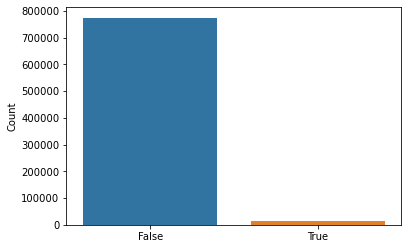

In [38]:
#The values of isFraud 
fraud_vals = data['isFraud'].value_counts()
#Represntation the the number of True and number of False
sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')

#### Unfortunately the classes are extremely unbalanced. A technique such as under-sampling would help even out the classes.

In [39]:
#The expirationDateKeyInMatch and their transactions
data["expirationDateKeyInMatch"].value_counts().to_frame().style.background_gradient()

,expirationDateKeyInMatch
False,785320
True,1043


#### Appears to 1043 records have not matched with expiry dates that were supposed to be of the customer.

## Q2: Plot histogram of processed amounts of transaction and transactionAmount column and describe the structure

<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

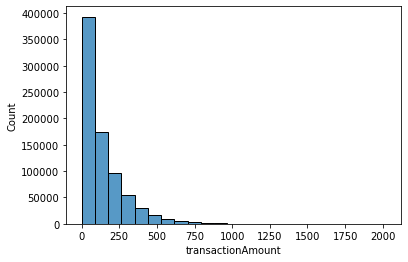

In [40]:
#Plotted histogram of transactionAmount
sns.histplot(data["transactionAmount"], binwidth=data["transactionAmount"].median())

#### Obeservation:<br>1) The maximum number of transactions are placed when the amount is minimum,<br>2) When the transaction amount interval is between 0 to 250 there are higher range of transactions made over 100000.<br>3) The structure of histogram plot above is right skewed and not normally distributed.

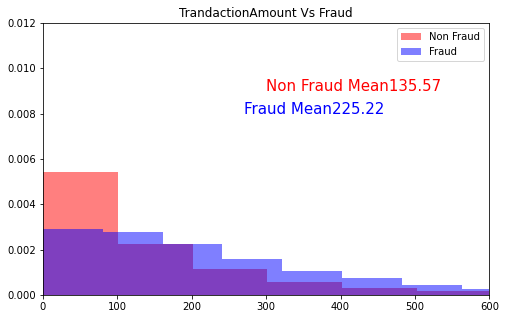

In [41]:
#Subplot of transaction amount vs fraud
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 600)
ax.set_ylim(0, 0.012)
ax.text(300, 0.009, "Non Fraud Mean" + str(round(data[data['isFraud'] == False]["transactionAmount"].values.mean(), 2)),
        fontsize=15, color='r')
ax.text(270, 0.008, "Fraud Mean" + str(round(data[data['isFraud'] == True]["transactionAmount"].values.mean(), 2)),
        fontsize=15, color='b')
#Plot the histogram of the values with respective of fraud and non-fraud
plt.hist(data[data['isFraud'] == False]["transactionAmount"], 20, alpha=0.5, label='Non Fraud', density=True, color='r')
plt.hist(data[data['isFraud'] == True]["transactionAmount"], 20, alpha=0.5, label='Fraud', density=True, color='b')
plt.title("TrandactionAmount Vs Fraud")
plt.legend(loc='upper right')

In [42]:
#Created a dictionary of the seperate values
my_dict = {'Non Fraud': list(data[data['isFraud'] == False]["transactionAmount"].values),
           'Fraud': list(data[data['isFraud'] == True]["transactionAmount"].values)}

[Text(1, 0, 'Non Fraud'), Text(2, 0, 'Fraud')]

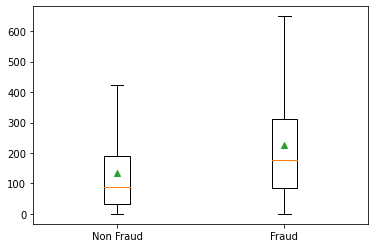

In [43]:
#The boxplot to validate the above
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), showmeans=True, showfliers=False)
ax.set_xticklabels(my_dict.keys())

#### Observations:<br>1) With increasing transaction amount the comparitive percentage of fraud transactions are increasing<br>2) It is observed the mean on the non-fraud transaction is 135.57 and of fraud transaction is 225.22<br>3) The quartile range of fraud transactions have a broader range compared to non fraud transactions

Text(0, 0.5, 'Transaction Amount')

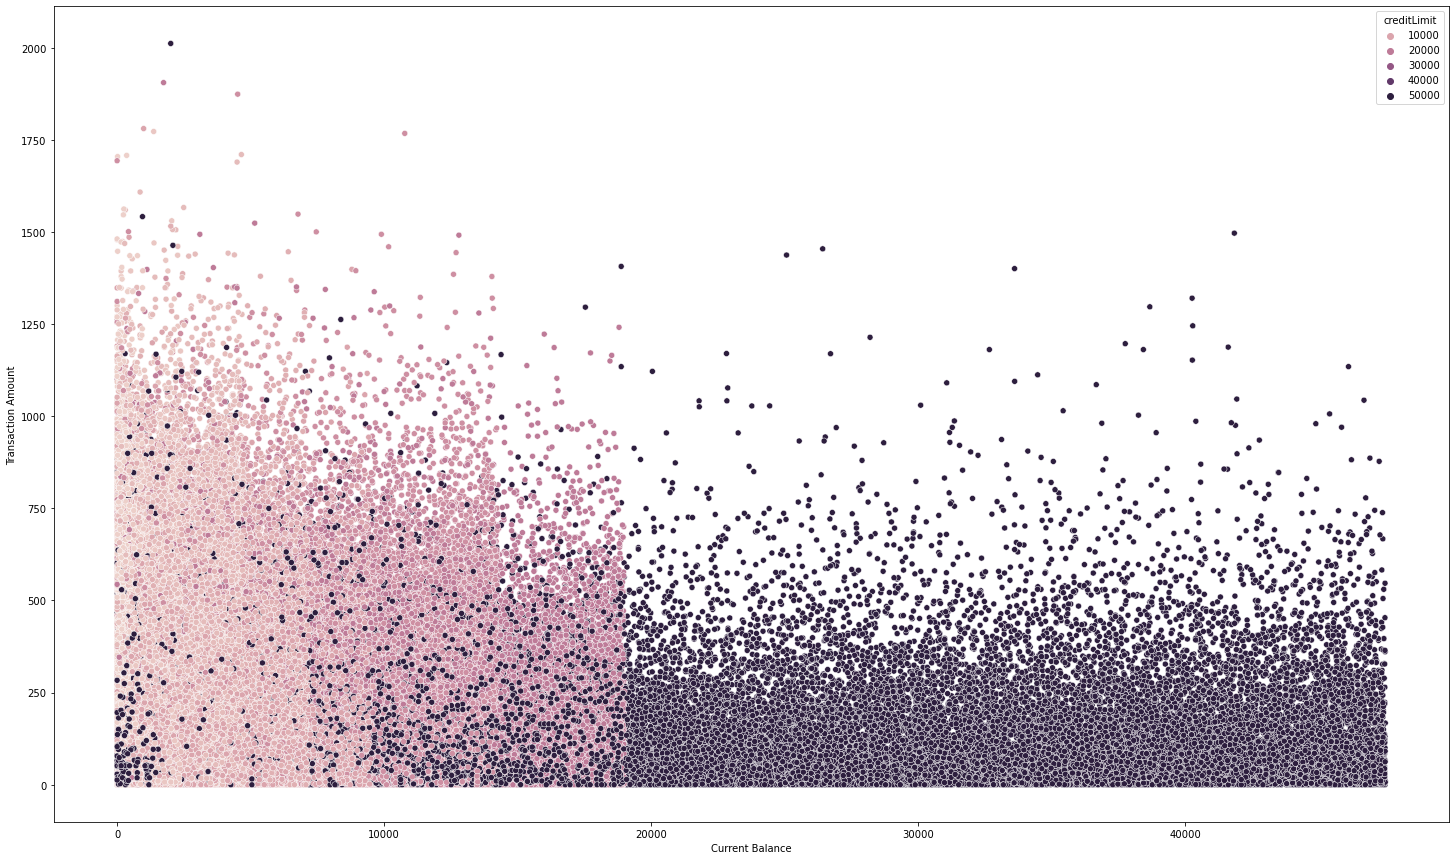

In [44]:
#Scatter plot of currentBalance and transactionAmount with respective to creditLimit
plt.figure(figsize=(25, 15))
sns.scatterplot(data=data, x='currentBalance', y='transactionAmount', hue='creditLimit')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')

#### Assumtion: People with larger credit line tend to have larger current balance, People with lesser current balance have lesser limit and transaction amount to be less<br>Observation:<br>1) Some people with really high credit limits have 0 in their current balance<br>2) People tend to have credit limit of $40,000<br> 

In [45]:
#If fraud equals true the data is sent to the variable
transacations_fraud = data[data['isFraud'] == True]

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraudulent Transactions')

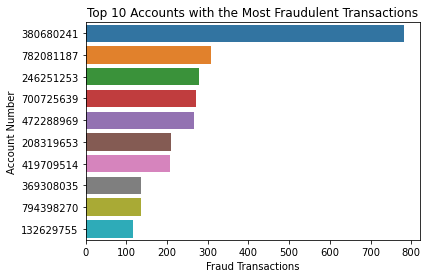

In [46]:
#To find the the first 10 fraud accounts via barplot
first10fraud_accounts = transacations_fraud['accountNumber'].value_counts().head(10)
sns.barplot(y=list(range(10)), x=first10fraud_accounts.values, orient='h')
plt.yticks(ticks=list(range(10)), labels=first10fraud_accounts.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraud Transactions')
plt.title('Top 10 Accounts with the Most Fraudulent Transactions')

In [47]:
#Finding the percent of total fraud transaction
data[data["isFraud"] == True]["transactionAmount"].sum() / data["transactionAmount"].sum()

0.025960744672354475

#### The account number "380680241" as it has a lot of fraudulent transactions.<br>2.6% of total transaction amount comprises of fraud transactions.

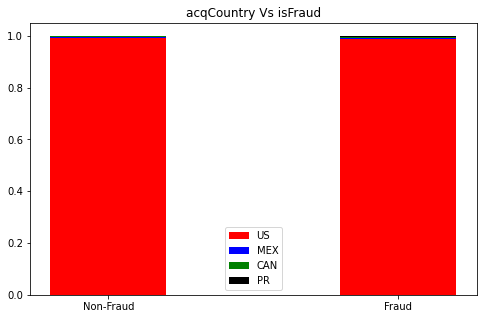

In [48]:
#Depecting the relation among acqCountry with respective to fraud and non-fraud
acqCountry_0=data[data["isFraud"]==False]['acqCountry'].value_counts(normalize=True)
acqCountry_1=data[data["isFraud"]==True]['acqCountry'].value_counts(normalize=True)

x  = ["Non-Fraud","Fraud"]
y1 = np.array([acqCountry_0[0],acqCountry_1[0]])
y2 = np.array([acqCountry_0[1],acqCountry_1[1]])
y3 = np.array([acqCountry_0[2],acqCountry_1[2]])
y4 = np.array([acqCountry_0[3],acqCountry_1[3]])
plt.figure(figsize=(8,5))
plt.title("acqCountry Vs isFraud")

#Plot bars in stack manner
plt.bar(x, y1, color='r',width=0.4)
plt.bar(x, y2, bottom=y1, color='b',width=0.4)
plt.bar(x, y3, bottom=y1+y2, color='g',width=0.4)
plt.bar(x, y4, bottom=y1+y2+y3, color='k',width=0.4)
plt.legend(["US","MEX","CAN","PR"])
plt.show()

In [49]:
#Printing fraud
data[data["isFraud"]==False]['acqCountry'].value_counts()

US     762587
MEX      3066
CAN      2369
PR       1511
Name: acqCountry, dtype: int64

In [50]:
#Printing non-fraud
data[data["isFraud"]==True]['acqCountry'].value_counts()

US     12122
MEX       64
CAN       55
PR        27
Name: acqCountry, dtype: int64

#### From the above we could clearly see that the "US" isFraud comprising of 99% and "US" non-fraud of about 98%. To check if there is a significant effect over isFraud we perform hypothesis testing.

In [51]:
#Respective values of the acq_val_count
acq_val_count=[[767000,3066,2369,1511],[12271,64,55,27]]

In [52]:
#Importing library for testing
from scipy.stats import chi2_contingency

In [53]:
#Chi-square test for P-Value
chi2_contingency(acq_val_count)[1]

0.006741138832114

#### Since the p-value is very low less than 0.05 we reject the null hypothesis . This states that there is some effect on IsFraud.our visualisation from above is contemplating this hypothesis understanding 

## Q3: Data Wrangling- Duplicate Transactions 

In [54]:
#Replacing the null values
data["acqCountry"].fillna("US", inplace=True)

In [55]:
#Replacing the null values
data["merchantCountryCode"].fillna("US", inplace=True)

#### Replaced the values with US in "acqCountry","merchantCountryCode" as 99% of the data of these feilds comprises of US and with an assumption that it could be the mode to replace the value. 

In [56]:
#Displaying the codes
data["posEntryMode"].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
Name: posEntryMode, dtype: int64

In [57]:
#Replacing the null values
data["posEntryMode"].fillna("05", inplace=True)

#### Filling the null value with 05(integrated circuit reader) as it is the record with highest number of transactions, with an assumption of it being a mode. 

In [58]:
#Replacing null values
data["posConditionCode"].value_counts()

01    628787
08    149634
99      7533
Name: posConditionCode, dtype: int64

In [59]:
#Filling the null with 01
data["posConditionCode"].fillna("01", inplace=True)

#### Filling the null value with 01(card holder not present) as it is the record with highest number of transactions, with assumption of it being a mode

In [60]:
#Replace the null value
data["transactionType"].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

In [61]:
#Filling the null with purchase
data["transactionType"].fillna("PURCHASE", inplace=True)

#### Filling the null value with purchase as it is the record with highest number of transactions, with assumption of it being a mode

In [62]:
#Reversal transactions
data[data["transactionType"] == "REVERSAL"]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False
73,574788567,574788567,2500.0,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,...,2015-10-13,2015-10-13,579,579,4219,REVERSAL,67.28,True,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500.0,968.33,2016-09-29T02:04:32,10.05,cheapfast.com,US,US,02,...,2013-06-15,2013-06-15,421,421,3424,REVERSAL,1531.67,False,False,False
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,2014-11-17,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,4668.67,True,False,False
786225,638498773,638498773,10000.0,4393.10,2016-11-06T22:54:25,49.39,Shake Shack #118502,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,5606.90,True,False,False


In [63]:
#Dropped the transactions of reversal
data1 = data.drop(data[data["transactionType"] == "REVERSAL"].index)

In [64]:
#Printing only first 10 chars that includes transactionDateTime
data1["x"] = data1["transactionDateTime"].apply(lambda x: x[:10])

In [65]:
data1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,x
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,2016-08-13
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,2016-10-11
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-11-08
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-12-10
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,2016-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,2016-12-22
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,2016-12-25
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,2016-12-27
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,2016-12-29


#### Multi swipe transactions after removing the reversal transactions

In [66]:
#The aspects that effect multiswipe
Multi_swipe = data1[data1.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'x'])]

In [67]:
Multi_swipe

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,x
263,984504651,984504651,50000.0,26680.99,2016-03-12T06:34:29,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,2016-03-12
264,984504651,984504651,50000.0,26562.47,2016-03-12T06:36:41,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,2016-03-12
281,984504651,984504651,50000.0,24316.12,2016-03-18T13:57:04,26.71,Planet Fitness #692929,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,2016-03-18
339,984504651,984504651,50000.0,16503.49,2016-04-08T22:21:11,43.21,WSC #994275,US,US,02,...,2016-03-26,640,640,8332,PURCHASE,33496.51,False,False,False,2016-04-08
413,984504651,984504651,50000.0,7302.32,2016-05-07T07:32:54,23.82,Golds Gym #846582,US,US,09,...,2016-05-05,640,640,8332,PURCHASE,42697.68,True,False,False,2016-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785758,207667444,207667444,7500.0,6893.70,2016-10-14T13:24:58,79.82,discount.com,US,US,02,...,2016-08-16,235,235,9853,PURCHASE,606.30,False,False,False,2016-10-14
785915,428856030,428856030,250.0,104.44,2016-10-30T20:59:18,314.07,Rodeway Inn #438868,US,US,02,...,2009-08-17,990,990,7660,PURCHASE,145.56,True,False,False,2016-10-30
785983,205026043,205026043,5000.0,451.59,2016-06-07T22:29:11,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4548.41,False,False,False,2016-06-07
785984,205026043,205026043,5000.0,433.52,2016-06-07T22:30:57,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4566.48,False,False,False,2016-06-07


#### The transactions made to the same merchant various times on the same day could be treated as duplicate transactions hence the above considered features if found same multiple times they are stored in Multi_swipe.

In [68]:
#The total Multi_swipe and length of it
print(Multi_swipe["transactionAmount"].sum())
len(Multi_swipe)

1103230.78


7834

#### There are 7834 records that are multi swiped comprising of total amount $1103230.78.

In [69]:
#Dropping the x column comprising transactiondate
Multi_swipe.drop('x', inplace=True, axis=1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
#Setting the index of Multi_swipe as list
ind1 = list(Multi_swipe.index)

In [71]:
#Dropping them and storing in df1
df1 = data.drop(ind1, axis=0)

In [72]:
#All data related to reversal transaction
reversal = data[data["transactionType"] == "REVERSAL"]

In [73]:
#Reversal data
reversal

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False
73,574788567,574788567,2500.0,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,...,2015-10-13,2015-10-13,579,579,4219,REVERSAL,67.28,True,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500.0,968.33,2016-09-29T02:04:32,10.05,cheapfast.com,US,US,02,...,2013-06-15,2013-06-15,421,421,3424,REVERSAL,1531.67,False,False,False
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,2014-11-17,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,4668.67,True,False,False
786225,638498773,638498773,10000.0,4393.10,2016-11-06T22:54:25,49.39,Shake Shack #118502,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,5606.90,True,False,False


In [74]:
#Reversal index to list
rev_ind = reversal.index.to_list()

In [75]:
#Dropping them and storing in df2
df2 = df1.drop(rev_ind, axis=0)

In [76]:
print(reversal["transactionAmount"].sum())
len(reversal)

2821792.5


20303

#### The data of the reversal transaction is stored in reversal, there are total of 20303 reversal transaction type records summing upto $2821792.5

#### Comparing both reversal and multi swiped , reversal transactions are more in number and have higher total amount produced in dollars.<br>Assumptions:<br>1) Could be that the Returns are more that could be treated as reversal<br>2) Faulty products could give out a reversal

In [77]:
#Checking for null
df2.isna().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [78]:
#Resetting index
data_model = df2.reset_index(drop=True)

In [79]:
#New updated variable
data_model

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758221,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
758222,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
758223,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
758224,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [80]:
#Created a variable to format time
ch11 = data_model[["transactionDateTime", "isFraud"]]

In [81]:
#Formatted time from transactionDateTime
ch11["time"] = ch11["transactionDateTime"].apply(lambda x: x[11:13])

/var/folders/_s/6tsz_gr96gn40jcqytdyzmh00000gn/T/ipykernel_4678/3038079543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch11["time"] = ch11["transactionDateTime"].apply(lambda x: x[11:13])


In [82]:
#Formatted to integer
ch11["time"] = ch11["time"].astype(int)

/var/folders/_s/6tsz_gr96gn40jcqytdyzmh00000gn/T/ipykernel_4678/1244498148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch11["time"] = ch11["time"].astype(int)


In [83]:
#Created a dictionary for fraud timings and non-fraud timings
my_dict = {'Non Fraud': list(ch11[ch11['isFraud'] == False]["time"].values),
           'Fraud': list(ch11[ch11['isFraud'] == True]["time"].values)}

[Text(1, 0, 'Non Fraud'), Text(2, 0, 'Fraud')]

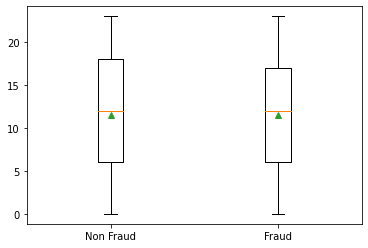

In [84]:
#Plotting the insights
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), showmeans=True, showfliers=False)
ax.set_xticklabels(my_dict.keys())

#### This states that the fraud has no relation with the time and could happen at any instance

In [85]:
#Columns at present
data_model.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [86]:
#Creating a new feature cvv_mismatch
data_model["cvv_mismatch"] = data_model["enteredCVV"] != data_model["cardCVV"]

#### Created a new feature called 'cvv_mismatch' that is mapped to 0 if there is no match between enteredcvv and cardcvv, 1 otherwise. The intention behind this feature is the assumption that there could be fraud transaction if there is no match between entered cvv and card cvv.

In [87]:
#Columns not in use for the modelling
useless_cols = ['accountNumber', 'customerId', 'transactionDateTime', 'currentExpDate', 'accountOpenDate',
                'cardLast4Digits', 'dateOfLastAddressChange', 'enteredCVV', 'cardCVV', "merchantName"]

#### The above mentioned columns are not required for further modelling. accountNumber, customerID: These two are ID's that are indentical and not required to estimate target transactionDateTime, currentExpDate, accountOpenDate: They are independent features so are not considered while modelling. cardLast4Digits, dateOfLastAddressChange, enteredCVV, cardCVV, merchantName: Personal indentifiable information has no effect towards modelling.

In [88]:
#Remaining columns
rem_cols = [i for i in list(data_model.columns) if i not in useless_cols]

In [89]:
#Columns used for modelling
rem_cols

['creditLimit',
 'availableMoney',
 'transactionAmount',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'isFraud',
 'cvv_mismatch']

#### The above 14 columns are the columns that are used for the modelling.

In [90]:
#Updated the data_model
data_model = data_model[rem_cols]

In [91]:
#The boolean columns from the dataset
bool_cols = ['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'cvv_mismatch']

#### Above 4 columns are the columns of type boolean

In [92]:
#All the boolean columns are converted to binary
for i in bool_cols:
    data_model[i] = data_model[i].apply(lambda x: 0 if x == False else 1)

/var/folders/_s/6tsz_gr96gn40jcqytdyzmh00000gn/T/ipykernel_4678/1217037608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model[i] = data_model[i].apply(lambda x: 0 if x == False else 1)


## Q4: Data Modelling

In [93]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [94]:
#y is the target to be predicted
y = data_model['isFraud']

#X is the rest of the data 
X = data_model.drop('isFraud', axis=1)

In [95]:
#Spliting with train size 0.8 and random state 1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=1)

In [96]:
#Training data
X_train

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,cvv_mismatch
409441,5000.0,4227.67,136.32,US,US,02,08,fastfood,PURCHASE,772.33,1,0,0
669138,15000.0,1391.08,126.03,US,US,05,01,entertainment,PURCHASE,13608.92,1,0,0
299339,7500.0,7500.00,16.09,US,US,02,01,online_gifts,PURCHASE,0.00,0,0,0
684940,5000.0,547.44,493.13,US,US,90,01,fastfood,PURCHASE,4452.56,1,0,0
484813,5000.0,2442.04,8.51,US,US,09,01,online_retail,PURCHASE,2557.96,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,2500.0,2500.00,236.44,US,US,05,01,food,PURCHASE,0.00,1,0,0
491263,5000.0,2108.56,317.32,US,US,05,01,rideshare,PURCHASE,2891.44,0,0,0
470924,7500.0,938.45,355.92,US,US,02,08,food,PURCHASE,6561.55,1,0,0
491755,20000.0,11199.86,36.70,US,US,05,01,fuel,PURCHASE,8800.14,1,0,0


#### 1) The data is spilt into training and testing and the X_train is the training set of 13 feilds.<br>2) y_train comprises of just the target variable

In [97]:
#Importing label encoder for categorical variables
from sklearn.preprocessing import LabelEncoder

In [98]:
#Initialising label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()

In [99]:
#Assigning
encoders = [le1, le2, le3, le4, le5, le6]

In [100]:
#The categorical features of the data
cat_features = ["acqCountry", "merchantCountryCode", "posEntryMode", "posConditionCode", "merchantCategoryCode",
                "transactionType"]

In [101]:
#Fitting the categorical features 
for i in range(len(cat_features)):
    X_train[cat_features[i]] = encoders[i].fit_transform(X_train[cat_features[i]])

/var/folders/_s/6tsz_gr96gn40jcqytdyzmh00000gn/T/ipykernel_4678/1562320469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features[i]] = encoders[i].fit_transform(X_train[cat_features[i]])


In [102]:
#Updated training data
X_train

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,cvv_mismatch
409441,5000.0,4227.67,136.32,3,3,0,1,4,1,772.33,1,0,0
669138,15000.0,1391.08,126.03,3,3,1,0,3,1,13608.92,1,0,0
299339,7500.0,7500.00,16.09,3,3,0,0,13,1,0.00,0,0,0
684940,5000.0,547.44,493.13,3,3,4,0,4,1,4452.56,1,0,0
484813,5000.0,2442.04,8.51,3,3,2,0,14,1,2557.96,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,2500.0,2500.00,236.44,3,3,1,0,5,1,0.00,1,0,0
491263,5000.0,2108.56,317.32,3,3,1,0,17,1,2891.44,0,0,0
470924,7500.0,938.45,355.92,3,3,0,1,5,1,6561.55,1,0,0
491755,20000.0,11199.86,36.70,3,3,1,0,7,1,8800.14,1,0,0


#### We can try different encoding techniques for categorical variables, and we have seen there are more unique values in some of the features but most of their contribution is very low. So those values whose contribution is low can be aggerated as a single value, this would help us if we use one hot encodeing where we create dummies

In [103]:
#Unique values of the target
y_train.value_counts()

0    597071
1      9509
Name: isFraud, dtype: int64

In [104]:
#under_sampling
from imblearn.under_sampling import RandomUnderSampler

In [105]:
#Initialising randomundersampler
undersample = RandomUnderSampler(sampling_strategy='majority')

#Fitting the randomundersampler
X_train_sam, y_train_sam = undersample.fit_resample(X_train, y_train)

#### Since the data is quite imbalanced data of over 99.9% of non-fraud transactions and 0.01% of fraud transactions, there could be two ways to solve either oversampling or undersampling. If used oversampling i.e., making minority class equal to the majority class the output would generate much more records of over 1000000 which is not suitable for the training data Hence used Random under sampling. 

##### Logitic Regression

In [106]:
#Performing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [107]:
#Initialising
lr = LogisticRegression()

In [108]:
#Fitting the model
lr.fit(X_train_sam, y_train_sam)

LogisticRegression()

In [109]:
#Performance metrics
def get_metrics(y_test, y_pred):
    cm_rf_1 = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])# generating confusion matrix
    cm_rf_1 = cm_rf_1.flatten()
    acc = metrics.accuracy_score(y_test, y_pred)#for accuracy score
    spec = (cm_rf_1[3] / (cm_rf_1[2] + cm_rf_1[3])) / (
                (cm_rf_1[3] / (cm_rf_1[2] + cm_rf_1[3])) + (cm_rf_1[1] / (cm_rf_1[0] + cm_rf_1[1])))
    roc_auc = metrics.roc_auc_score(y_test, y_pred)#roc curve
    fpr = cm_rf_1[1] / (cm_rf_1[0] + cm_rf_1[1])
    fnr = cm_rf_1[2] / (cm_rf_1[2] + cm_rf_1[3])
    return np.array([acc, spec, roc_auc, fpr, fnr])

In [110]:
#Transforming the encoded variables
for i in range(len(cat_features)):
    X_test[cat_features[i]] = encoders[i].transform(X_test[cat_features[i]])

/var/folders/_s/6tsz_gr96gn40jcqytdyzmh00000gn/T/ipykernel_4678/272693922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cat_features[i]] = encoders[i].transform(X_test[cat_features[i]])


In [111]:
#Predicting
y_test_pred = lr.predict(X_test)

In [112]:
#Import metrics
from sklearn import metrics

In [113]:
#Accuracy display
metrics.accuracy_score(y_test, y_test_pred)

0.7032958337180011

In [114]:
#Metrics of lr
metrics_lr = get_metrics(y_test, y_test_pred)

In [115]:
#Classification report
cf_res = pd.DataFrame(columns=["Accuracy", "Specificity", "Roc_Auc", "False Positive Rate", "False Negative Rate", ])
cf_res.loc["Logistic"] = metrics_lr

In [116]:
#Display of classification report
cf_res

,Accuracy,Specificity,Roc_Auc,False Positive Rate,False Negative Rate
Logistic,0.703296,0.618036,0.634755,0.436066,0.294425


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


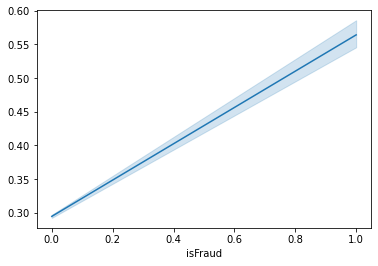

In [117]:
#Lineplot to the predicted line
sns.lineplot(y_test,y_test_pred)
plt.show()

##### Gradient Boosting

In [118]:
#Gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
#Initialising GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [120]:
#Fitting the Classifier
gb.fit(X_train_sam, y_train_sam)

GradientBoostingClassifier()

In [121]:
#Prediction
y_test_pred_gb = gb.predict(X_test)

In [122]:
#Performance metrics
metrics.accuracy_score(y_test, y_test_pred_gb)

0.7005394141619298

In [123]:
#Producing the metrics on the data
metrics_gb = get_metrics(y_test, y_test_pred_gb)

In [124]:
#Classification report
cf_res.loc["Gradient_Boosting"] = metrics_gb

In [125]:
#Print classification report
cf_res

,Accuracy,Specificity,Roc_Auc,False Positive Rate,False Negative Rate
Logistic,0.703296,0.618036,0.634755,0.436066,0.294425
Gradient_Boosting,0.700539,0.685124,0.689390,0.322131,0.299090


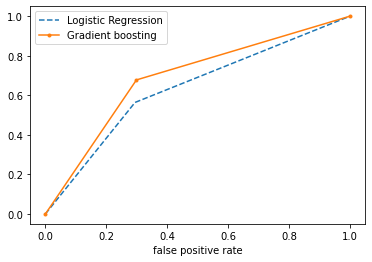

In [126]:
#generating the roc-auc curve for above model
from sklearn.metrics import roc_auc_score,roc_curve
lr_auc=roc_auc_score(y_test,y_test_pred)
gb_auc=roc_auc_score(y_test,y_test_pred_gb)
lr_fpr,lr_tpr,_=roc_curve(y_test,y_test_pred)
gb_fpr,gb_tpr,_=roc_curve(y_test,y_test_pred_gb)
plt.plot(lr_fpr,lr_tpr,linestyle="--",label="Logistic Regression")
plt.plot(gb_fpr,gb_tpr,marker=".",label="Gradient boosting")

plt.ylabel=("true positive rate")
plt.xlabel("false positive rate")
plt.legend()
plt.show()

#### Used classification techniques to predict the binary variable . <br><br>Logistic Regression has about 71% accuracy so as Gradient Boosting.<br><br>The idea behind using Logistic regression is for business purpose. Logistic Regression can be explained much easier as it derives an equation which could be used as an evidence to the target. Further it is bias towards the false positive.<br><br>The objective of Gradient boosting classifier is to minimize the loss between actual class value of training and the predicted class. It is an ensemble of weak prediction models. Gradient boosting has almost same false positive and false negative rate.

## Future scope

#### 1) We could try implementing Black Box models.<br><br>2) More feature engineering can be done like adding features by combining two or more actual feature like what is done to obtian cvv_mismatch using enteredcvv, actualcvv.<br> <br>3) We can try different encoding techniques for categorical variables, and we have seen there are more unique values in some of the features but most of their contribution is very low. So those values whose contribution is low can be aggregated as a single value, this would help us if we use one hot encoding where we create dummies.<br><br>4) The data is imbalanced and almost 783k records are there, so if we do oversampling the results may be more accurate but we are trying to double the number of records, in undersampling as well we can use multiple algorithms like nearmiss, condensednearestneighbour etc. So, the records which are pretty close to each other will get dropper  rather than randomly getting dropped. <br><br> 5) We can also do hyperparameter tuning to get the better estimates. <br><br>6) We can also try different models and go for Neural Networks.